Graph Traversal

In [1]:
import networkx as nx
import numpy as np
import math

### (1) Breath First Search Algorithm implementation from scratch

Trace the shortest path back to the source N in graph G

In [2]:
def BreadthFirstSearch(G, N):
    
    #initialize queue
    Q = []
    visited_nodes = []
    
    #add source node N to queue and mark as visited
    Q.append(N)
    visited_nodes.append(N)
    
    #while to queue is not empty, get the next node in the queue
    while (len(Q) > 0):
        V = Q.pop(0)
        neighbors_V = [n for n in nx.neighbors(G, V)]
        for v  in neighbors_V:
            if (v not in visited_nodes):
                Q.append(v)
                visited_nodes.append(v)
                
    return visited_nodes

### (2) Dijkstra’s Shortest Path implementation from scratch
Dijkstra's alogrithm will compute the shortest path from Node N to all nodes in the graph G

In [3]:
def Dijkstra(G, N):
    unvisited_nodes = list(G.nodes())
    visited_nodes = []
    distances = {}
    prev = {}

    #initialize distances of all nodes from N as infinity
    for n in unvisited_nodes:
        distances[n] = math.inf
        prev[n] = ''

    #initialize distance of node N as 0
    distances[N] = 0

    while (len(unvisited_nodes) > 0):

        #pick node X from unvisited array with shortest distance from N
        min_dist = min([distances[x] for x in unvisited_nodes])
        X = ''
        for x in unvisited_nodes:
            if (distances[x] <= min_dist):
                X = x

        #for each vertex Y that is a neighbour of X
        neighbors_X = [n for n in nx.neighbors(G, X)]
        for Y in neighbors_X:

            #compute the distance of Y from N using X as an intermediary node
            weight = 1  #constant for unweighted
            
            new_dist_Y = distances[X] + weight

            #if the new_distance(Y) < old_distance(Y) then replace old_distance(Y) with new_distance(Y) and prev_vertex of Y with X
            if (new_dist_Y < distances[Y]):
                distances[Y] = new_dist_Y
                prev[Y] = X

        visited_nodes.append(X)
        unvisited_nodes.remove(X)
              
    #shortest paths
    shortest_path = {}
    for node in prev.keys():
        shortest_path[node] = getPath(node, prev)
    
    #sort and return the dictionary of shortest paths for node N
    return dict((x, y) for x, y in sorted(shortest_path.items(), key = lambda kv:len(kv[1])))


#helper function to get the path to node n based on prev 
def getPath(n, prev):
    if (prev[n] == ''):
        return ([n])
    else:
        return (getPath(prev[n], prev))+[n]



{'A': ['A'],
 'B': ['A', 'B'],
 'C': ['A', 'C'],
 'D': ['A', 'C', 'D'],
 'E': ['A', 'C', 'D', 'E']}

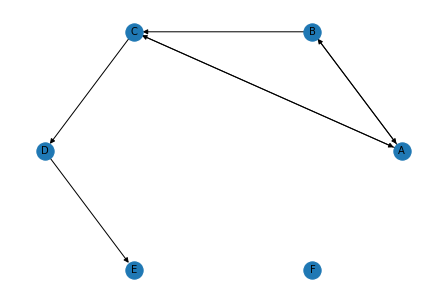

In [5]:
#test graph

G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('B', 'C'),('B', 'A'),('C','D'),('A','C'),('D', 'E'),('C','A')])
G.add_node('F')
nx.draw_circular(G, with_labels=True, font_size=10)

#compare with networkx shortest_path
nx.shortest_path(G, 'A')

### (3) How will you Modify (2) to identify the longest paths instead of shortest paths? Just describe in words. 


<b>Answer:</b> To identify the longest paths instead of the shortest, I would do the following:
<br>
<br>a) Initialize the distances to be negative infinite
<br>b) When comparing new distance to old distance, if new distance is larger than the old distance, I would keep the new distance instead of the smaller distance

<br>
<br>
<br>
<br>
<br>
<br>





## Comparing results with Networkx library 

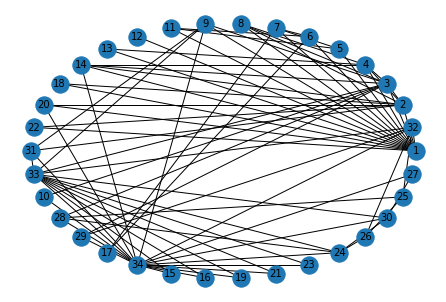

In [53]:
G = nx.read_edgelist('karate.edgelist')
nx.draw_shell(G, with_labels=True, font_size=10)

### BreadthFirstSearch from node '1'

In [54]:
BreadthFirstSearch(G, '1')

['1',
 '32',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '11',
 '12',
 '13',
 '14',
 '18',
 '20',
 '22',
 '25',
 '26',
 '29',
 '34',
 '33',
 '31',
 '10',
 '28',
 '17',
 '24',
 '15',
 '16',
 '19',
 '21',
 '23',
 '27',
 '30']

### BreadthFirstSearch using Networkx from node '1'

In [55]:
root ='1'
edges = nx.bfs_edges(G, '1')
nodes = [root] + [v for u, v in edges]
nodes

['1',
 '32',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '11',
 '12',
 '13',
 '14',
 '18',
 '20',
 '22',
 '25',
 '26',
 '29',
 '34',
 '33',
 '31',
 '10',
 '28',
 '17',
 '24',
 '15',
 '16',
 '19',
 '21',
 '23',
 '27',
 '30']

### Dijkstra algorithm from node '1'

In [56]:
Dijkstra(G, '1')

{'1': ['1'],
 '32': ['1', '32'],
 '2': ['1', '2'],
 '3': ['1', '3'],
 '4': ['1', '4'],
 '5': ['1', '5'],
 '6': ['1', '6'],
 '7': ['1', '7'],
 '8': ['1', '8'],
 '9': ['1', '9'],
 '11': ['1', '11'],
 '12': ['1', '12'],
 '13': ['1', '13'],
 '14': ['1', '14'],
 '18': ['1', '18'],
 '20': ['1', '20'],
 '22': ['1', '22'],
 '31': ['1', '9', '31'],
 '33': ['1', '9', '33'],
 '10': ['1', '3', '10'],
 '28': ['1', '3', '28'],
 '29': ['1', '3', '29'],
 '17': ['1', '7', '17'],
 '34': ['1', '20', '34'],
 '26': ['1', '32', '26'],
 '25': ['1', '32', '25'],
 '15': ['1', '20', '34', '15'],
 '16': ['1', '20', '34', '16'],
 '19': ['1', '20', '34', '19'],
 '21': ['1', '20', '34', '21'],
 '23': ['1', '20', '34', '23'],
 '24': ['1', '32', '26', '24'],
 '30': ['1', '20', '34', '30'],
 '27': ['1', '20', '34', '27']}

### Dijkstra algorithm using Networkx from node '1'

In [57]:
#compare with networkx shortest_path
nx.shortest_path(G, '1')

{'1': ['1'],
 '32': ['1', '32'],
 '2': ['1', '2'],
 '3': ['1', '3'],
 '4': ['1', '4'],
 '5': ['1', '5'],
 '6': ['1', '6'],
 '7': ['1', '7'],
 '8': ['1', '8'],
 '9': ['1', '9'],
 '11': ['1', '11'],
 '12': ['1', '12'],
 '13': ['1', '13'],
 '14': ['1', '14'],
 '18': ['1', '18'],
 '20': ['1', '20'],
 '22': ['1', '22'],
 '25': ['1', '32', '25'],
 '26': ['1', '32', '26'],
 '29': ['1', '32', '29'],
 '34': ['1', '32', '34'],
 '33': ['1', '32', '33'],
 '31': ['1', '2', '31'],
 '10': ['1', '3', '10'],
 '28': ['1', '3', '28'],
 '17': ['1', '6', '17'],
 '24': ['1', '32', '26', '24'],
 '15': ['1', '32', '34', '15'],
 '16': ['1', '32', '34', '16'],
 '19': ['1', '32', '34', '19'],
 '21': ['1', '32', '34', '21'],
 '23': ['1', '32', '34', '23'],
 '27': ['1', '32', '34', '27'],
 '30': ['1', '32', '34', '30']}